In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Rename columns for clarity
df.columns = ['label', 'message']
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
# Preview
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


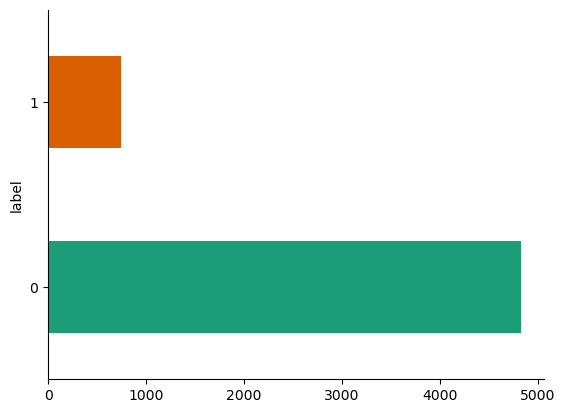

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check unique labels
print("\nUnique labels:", df['label'].unique())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values:
 label      0
message    0
dtype: int64

Unique labels: [0 1]

Number of duplicate rows: 415


In [6]:
# Remove duplicate rows
df = df.drop_duplicates()

# Confirm removal
print("New shape after removing duplicates:", df.shape)


New shape after removing duplicates: (5157, 2)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Separate features and labels
X = df['message']
y = df['label']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization (text → numerical features)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test_tfidf)[:, 1]):.4f}\n")

Naive Bayes Performance:
Accuracy: 0.9690
Precision: 1.0000
Recall: 0.7647
F1-Score: 0.8667
ROC-AUC: 0.9831

SVM Performance:
Accuracy: 0.9835
Precision: 0.9474
Recall: 0.9265
F1-Score: 0.9368
ROC-AUC: 0.9891

Random Forest Performance:
Accuracy: 0.9806
Precision: 0.9915
Recall: 0.8603
F1-Score: 0.9213
ROC-AUC: 0.9880

Logistic Regression Performance:
Accuracy: 0.9525
Precision: 0.9579
Recall: 0.6691
F1-Score: 0.7879
ROC-AUC: 0.9871



In [10]:
new_email = ["Congratulations! You've won a free cruise. Call now to claim!"]
new_email_2 = ["Hey, just checking in. Are we still on for lunch today?"]


In [11]:
new_email_tfidf = vectorizer.transform(new_email)
nb_pred = models['Naive Bayes'].predict(new_email_tfidf)
print("Naive Bayes Prediction:", "Spam" if nb_pred[0] == 1 else "Not Spam")

new_email_2_tfidf = vectorizer.transform(new_email_2)
nb_pred = models['Naive Bayes'].predict(new_email_2_tfidf)
print("Naive Bayes Prediction:", "Spam" if nb_pred[0] == 1 else "Not Spam")

Naive Bayes Prediction: Spam
Naive Bayes Prediction: Not Spam


In [12]:
svm_pred = models['SVM'].predict(new_email_tfidf)
print("SVM Prediction:", "Spam" if svm_pred[0] == 1 else "Not Spam")

svm_pred = models['SVM'].predict(new_email_2_tfidf)
print("SVM Prediction:", "Spam" if svm_pred[0] == 1 else "Not Spam")

SVM Prediction: Spam
SVM Prediction: Not Spam


In [13]:
rf_pred = models['Random Forest'].predict(new_email_tfidf)
print("Random Forest Prediction:", "Spam" if rf_pred[0] == 1 else "Not Spam")

rf_pred = models['Random Forest'].predict(new_email_2_tfidf)
print("Random Forest Prediction:", "Spam" if rf_pred[0] == 1 else "Not Spam")

Random Forest Prediction: Spam
Random Forest Prediction: Not Spam


In [14]:
lr_pred = models['Logistic Regression'].predict(new_email_tfidf)
print("Logistic Regression Prediction:", "Spam" if lr_pred[0] == 1 else "Not Spam")

lr_pred = models['Logistic Regression'].predict(new_email_2_tfidf)
print("Logistic Regression Prediction:", "Spam" if lr_pred[0] == 1 else "Not Spam")

Logistic Regression Prediction: Spam
Logistic Regression Prediction: Not Spam


In [15]:
import pickle
with open('model_svm.pkl', 'wb') as file:
    pickle.dump(models['SVM'], file)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
